In [311]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.keys()
plt.rc('font', family='serif')
params = {
   'axes.labelsize': 30,
   'axes.linewidth': 1.5,
   'legend.fontsize': 25,
   'legend.frameon': False,
   'lines.linewidth': 2,
   'xtick.direction': 'in',
   'xtick.labelsize': 25,
   'xtick.major.bottom': True,
   'xtick.major.pad': 10,
   'xtick.major.size': 10,
   'xtick.major.width': 1,
   'xtick.minor.bottom': True,
   'xtick.minor.pad': 3.5,
   'xtick.minor.size': 5,
   'xtick.minor.top': True,
   'xtick.minor.visible': True,
   'xtick.minor.width': 1,
   'xtick.top': True,
   'ytick.direction': 'in',
   'ytick.labelsize': 25,
   'ytick.major.pad': 10,
   'ytick.major.size': 10,
   'ytick.major.width': 1,
   'ytick.minor.pad': 3.5,
   'ytick.minor.size': 5,
   'ytick.minor.visible': True,
   'ytick.minor.width': 1,
   'ytick.right': True,
   'figure.figsize': [10,10], # instead of 4.5, 4.5
   'savefig.format': 'eps',
   'text.usetex': False,
   }
plt.rcParams.update(params)

In [312]:
df=pd.read_table('Recent_Contract_Awards.csv',delimiter=',')
df['StartY']=[int(i.split('/')[2]) for i in df['StartDate'].values]
df['StartD']=[int(i.split('/')[1]) for i in df['StartDate'].values]
df['StartM']=[int(i.split('/')[0]) for i in df['StartDate'].values]

In [313]:
# Q1
df=df.dropna(subset=['ContractAmount'])

df_Q1=df.loc[df['StartY']<=19]
df_Q1=df_Q1.loc[df_Q1['StartY']>=10]
df_Q1=df_Q1.dropna(subset=['ContractAmount'])
df_Q1=df_Q1.loc[df_Q1['ContractAmount']>0]

df_Q1_r=df.loc[~(df.index).isin(df_Q1.index)]

print(len(df),len(df_Q1)+len(df_Q1_r))

print(sum(df_Q1_r['ContractAmount']))

list(df_Q2.columns)

35122 35122
52259664446.94025


['RequestID',
 'StartDate',
 'EndDate',
 'AgencyName',
 'TypeOfNoticeDescription',
 'CategoryDescription',
 'ShortTitle',
 'SelectionMethodDescription',
 'SectionName',
 'SpecialCaseReasonDescription',
 'PIN',
 'DueDate',
 'AddressToRequest',
 'ContactName',
 'ContactPhone',
 'Email',
 'ContractAmount',
 'ContactFax',
 'AdditionalDescription1',
 'AdditionalDesctription2',
 'AdditionalDescription3',
 'OtherInfo1',
 'OtherInfo2',
 'OtherInfo3',
 'VendorName',
 'VendorAddress',
 'Printout1',
 'Printout2',
 'Printout3',
 'DocumentLinks',
 'EventDate',
 'EventBuildingName',
 'EventStreetAddress1',
 'EventStreetAddress2',
 'EventCity',
 'EventStateCode',
 'EventZipCode',
 'StartY',
 'StartD',
 'StartM']

In [283]:
# Q2
df_Q2=df_Q1.loc[df_Q1['AgencyName']=='Citywide Administrative Services']

vendors=df_Q2.VendorName.unique()
contracts=np.zeros(len(vendors))

for i in range(len(vendors)):
    contracts[i]=sum(df_Q2.loc[df_Q2['VendorName']==vendors[i]]['ContractAmount'])


In [284]:
contracts,vendors=zip(*sorted(zip(contracts,vendors)))
print(sum(contracts[-50:])/sum(contracts))

0.6361324095824241


In [285]:
# Q3
df_Q3=df_Q1.loc[df_Q1['CategoryDescription'].isin(['Construction/Construction Services','Construction Related Services'])]
df_Q3['CategoryDescription'].unique()

array(['Construction/Construction Services',
       'Construction Related Services'], dtype=object)

In [286]:
labelswith_CP=[i for i in df_Q3['ShortTitle'].values if 'CENTRAL PARK' in i and 'CENTRAL PARKWAY' not in i]
labelswith_WSP=[i for i in df_Q3['ShortTitle'].values if 'WASHINGTON SQUARE PARK' in i]

print(sum(df_Q3.loc[df_Q3['ShortTitle'].isin(labelswith_CP)]['ContractAmount']))
print(sum(df_Q3.loc[df_Q3['ShortTitle'].isin(labelswith_WSP)]['ContractAmount']))


13064125.6
8939669.24


In [287]:
13064125.6/8939669.24

1.4613656556268741

In [288]:
# Q4
df_Q4=df_Q1.loc[df_Q1['AgencyName']=='Citywide Administrative Services']
df_Q4=df_Q4[df_Q4['CategoryDescription']=='Goods']

In [289]:
years=df_Q4['StartY'].unique()
contpy=np.zeros(len(years))

for i in range(len(years)):
    df_Q4_y=df_Q4.loc[df_Q4['StartY']==years[i]]
    contpy[i]=sum(df_Q4_y['ContractAmount'])
    

In [290]:
# fit linear regression
z=np.polyfit(years, contpy, 1)
p=np.poly1d(z)

In [291]:
# calculate R2
def calcR2(x,y,p):
    y_ave=np.mean(y)
    SS_tot=sum(np.power(y-y_ave,2.))
    SS_res=sum(np.power(y-p(x),2.))
    return 1-SS_res/SS_tot

Text(0.5, 1.0, '$R^2$ is 0.36')

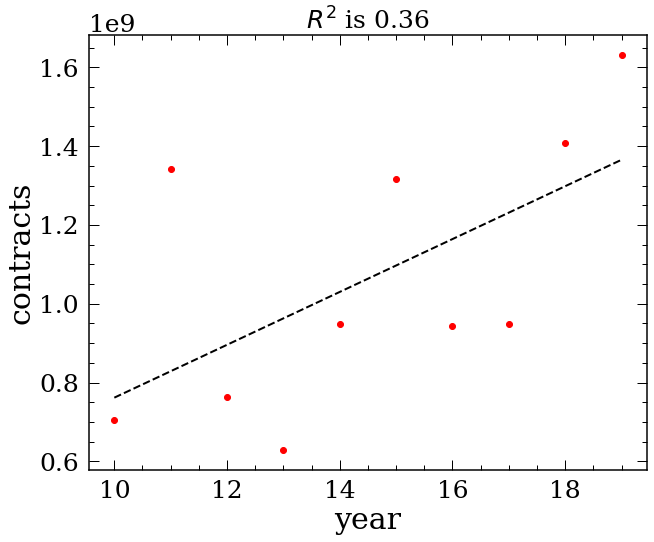

In [292]:
plt.figure(figsize=(10,8))
plt.plot(years,contpy,'ro')
plt.plot([min(years),max(years)],np.polyval(z,[min(years),max(years)]),'k--')
plt.xlabel('year')
plt.ylabel('contracts')
plt.title('$R^2$ is %.2f'%(calcR2(years,contpy,p)),fontsize=25)

In [293]:
# Q5
agencies=df_Q1['AgencyName'].unique()
conts_N=np.zeros(len(agencies))
conts_m=np.zeros(len(agencies))
for i in range(len(agencies)):
    df_Q5=df_Q1[df_Q1['AgencyName']==agencies[i]]
    conts_N[i]=len(df_Q5)
    conts_m[i]=np.mean(df_Q5['ContractAmount'])
    

In [294]:
conts_N,conts_m,agencies=zip(*sorted(zip(conts_N,conts_m,agencies)))
sortconm=sorted(conts_m[-5:])
print(sortconm[-1]/sortconm[-2])

4.7530520003098236


In [295]:
# Q6
df_Q6=df_Q1.loc[df_Q1['AgencyName']=='Parks and Recreation']

In [296]:
import datetime
df_Q6['StartDate_d']=[str(df_Q6['StartY'].values[i])+'-'+str(df_Q6['StartM'].values[i])+'-'+str(df_Q6['StartD'].values[i]) for i in range(len(df_Q6))]
#pd.Timestamp(df_Q6['StartDate'].values)
df_Q6['Dayofweek']=[pd.Timestamp(df_Q6['StartDate_d'].values[i]).dayofweek for i in range(len(df_Q6))]


/Users/lucy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/lucy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [297]:
null_hy=float(len(df_Q6))/5.

chisq=0
for i in df_Q6['Dayofweek'].unique():
    chisq=chisq+np.power(len(df_Q6.loc[df_Q6['Dayofweek']==i])-null_hy,2.)/null_hy


In [298]:
chisq
# should be around 4

96.97183098591549

In [300]:
# Q7
expend=[]
df_Q7=df_Q1.loc[df_Q1['AgencyName']=='Environmental Protection']
for i in [10+i for i in range(10)]:
    df_Q7_s=df_Q7.loc[df_Q7['StartY']==i]
    for j in [i+1 for i in range(12)]:
        df_Q7_s_m=df_Q7_s.loc[df_Q7_s['StartM']==j]
        if len(df_Q7_s_m)==0:
            expend.append(0)
        else:
            expend.append(sum(df_Q7_s_m['ContractAmount']))
        

In [301]:
expend=pd.Series(expend)

expend.autocorr(lag=12)

# the correlation is not strong 

0.09231292329069422

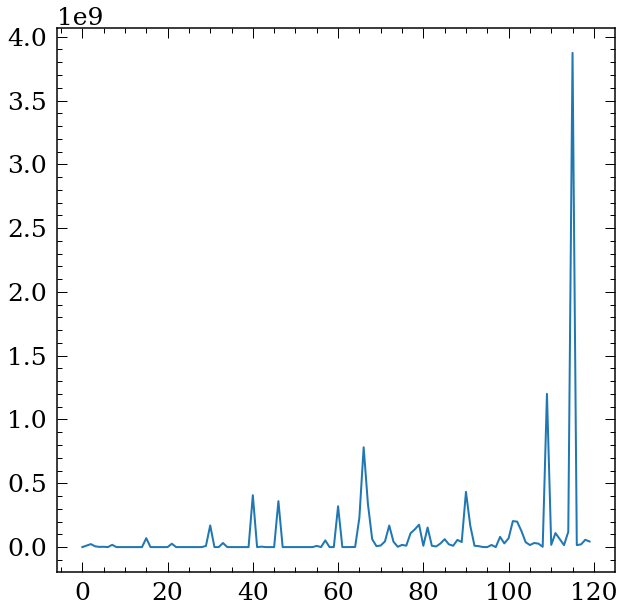

In [302]:
plt.plot(expend)

In [356]:
# Q8
NYzips=[10453, 10457, 10460,10458, 10467, 10468,10451, 10452, 10456,10454, 10455, 10459, 10474,10463, 10471,
       10466, 10469, 10470, 10475,10461, 10462,10464, 10465, 10472, 10473,11212, 11213, 11216, 11233, 11238,
        11209, 11214, 11228,11204, 11218, 11219, 11230,11234, 11236, 11239,11223, 11224, 11229, 11235,11201, 
        11205, 11215, 11217, 11231,11203, 11210, 11225, 11226,11207, 11208,11211, 11222,11220, 11232,11206, 
        11221, 11237,10026, 10027, 10030, 10037, 10039,10001, 10011, 10018, 10019, 10020, 10036,10029, 10035,
        10010, 10016, 10017, 10022,10012, 10013, 10014,10004, 10005, 10006, 10007, 10038, 10280,10002, 10003, 
        10009,10021, 10028, 10044, 10065, 10075, 10128,10023, 10024, 10025,10031, 10032, 10033, 10034, 10040,
        11361, 11362, 11363, 11364,11354, 11355, 11356, 11357, 11358, 11359, 11360,11365, 11366, 11367,11412,
        11423, 11432, 11433, 11434, 11435, 11436,11101, 11102, 11103, 11104, 11105, 11106,11374, 11375, 11379,
        11385,11691, 11692, 11693, 11694, 11695, 11697,11004, 11005, 11411, 11413, 11422, 11426, 11427, 11428,
        11429,11414, 11415, 11416, 11417, 11418, 11419, 11420, 11421,11368, 11369, 11370, 11372, 11373, 11377,
        11378,10302, 10303, 10310,10306, 10307, 10308, 10309, 10312,10301, 10304, 10305,10314]

df_Q8=df_Q1.loc[df_Q1['StartY']==18]

zips=np.zeros(len(df_Q8))
for i in range(len(df_Q8)):
    address=df_Q8.VendorAddress.values[i].split(' ')[-1]
    if 'N.Y.' in address:
        df_Q8.VendorAddress.values[i].split(' ')[-1].split('.')[-1]    
    if '(m/wbe)' in address:
        address=[i for i in df_Q8.VendorAddress.values[i].split(' ') if i][-2]
    if '(mwbe)' in address:
        address=df_Q8.VendorAddress.values[i].split(' ')[-2]
    if '(M/WBE)' in address:
        address = df_Q8.VendorAddress.values[i].split('(')[-2].split(' ')[-1]
        address = [i for i in df_Q8.VendorAddress.values[i].split('(')[-2].split(' ') if i][-1]
    if '.' in address:
        address = address.split('.')[-2]
    if 'MWBE' in address:
        address = df_Q8.VendorAddress.values[i].split(' ')[-2]
    if ',' in address:
        address = address.split(',')[-1]
    if '-' in address:
        address = address.split('-')[-2]
    try:
        int(address)
        zips[i]=address
    except:
        print("warning, can't convert to int!")
        zips[i]=0

df_Q8['zips']=zips
        

df_Q8_ny=df_Q8.loc[df_Q8['zips'].isin(NYzips)]
df_Q8_ew=df_Q8.loc[~df_Q8['zips'].isin(NYzips)]

sum(df_Q8_ny['ContractAmount'])

warning, can't convert to int!
warning, can't convert to int!
warning, can't convert to int!
warning, can't convert to int!
warning, can't convert to int!
warning, can't convert to int!
warning, can't convert to int!
warning, can't convert to int!
warning, can't convert to int!
warning, can't convert to int!
warning, can't convert to int!
warning, can't convert to int!
warning, can't convert to int!
warning, can't convert to int!
warning, can't convert to int!
warning, can't convert to int!
warning, can't convert to int!
warning, can't convert to int!
warning, can't convert to int!
warning, can't convert to int!
warning, can't convert to int!
warning, can't convert to int!


/Users/lucy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


6849963860.949998

In [358]:
sum(df_Q8_ny['ContractAmount'])/sum(df_Q8['ContractAmount']) # 36% are rewarded to NYC

0.3553228146604765